In [1]:
import os
import numpy as np
from sklearn.model_selection import train_test_split, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, silhouette_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, label_binarize, LabelEncoder, label_binarize
from sklearn.pipeline import make_pipeline
from sklearn.multiclass import OneVsRestClassifier
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import cv2
from skimage import io, color, feature, exposure
from sklearn.datasets import make_blobs

D:\Programes\anaconda\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


In [2]:
def extract_hog_features(image):
    gray_image = color.rgb2gray(image)
    hog_features, _ = feature.hog(gray_image, visualize=True)
    return hog_features

In [3]:
train_images_path = 'C:/Users/ibrah/Desktop/proj/few/few_train/images'
train_labels_path = 'C:/Users/ibrah/Desktop/proj/few/few_train/labels'

test_images_path = 'C:/Users/ibrah/Desktop/proj/few/few_test/images'
test_labels_path = 'C:/Users/ibrah/Desktop/proj/few/few_test/labels'

In [4]:
train_features_list = []
train_labels_list = []
i=0
for image_filename in os.listdir(train_images_path):
    i+=1
     
    image_path = os.path.join(train_images_path, image_filename)

    image = io.imread(image_path)

    hog_features = extract_hog_features(image)

    label_filename = os.path.splitext(image_filename)[0] + '.txt'
    label_path = os.path.join(train_labels_path, label_filename)

    try:
        with open(label_path, 'r') as label_file:
            class_label = int(label_file.readline().split()[0])

        train_features_list.append(hog_features)

        train_labels_list.append(class_label)
    except Exception as e:
        print(f"Error processing {label_path}: {e}")

Error processing C:/Users/ibrah/Desktop/proj/few/few_train/labels\bad-154-_jpg.rf.44e6d6e5d72c07ecfc33819199127a04.txt: [Errno 2] No such file or directory: 'C:/Users/ibrah/Desktop/proj/few/few_train/labels\\bad-154-_jpg.rf.44e6d6e5d72c07ecfc33819199127a04.txt'
Error processing C:/Users/ibrah/Desktop/proj/few/few_train/labels\bad-157-_jpg.rf.0912b9a1cfe658aea06135b55d343c2d.txt: [Errno 2] No such file or directory: 'C:/Users/ibrah/Desktop/proj/few/few_train/labels\\bad-157-_jpg.rf.0912b9a1cfe658aea06135b55d343c2d.txt'
Error processing C:/Users/ibrah/Desktop/proj/few/few_train/labels\bad-160-_jpg.rf.41a9803dc07ed02e5a0a94610f021f8d.txt: [Errno 2] No such file or directory: 'C:/Users/ibrah/Desktop/proj/few/few_train/labels\\bad-160-_jpg.rf.41a9803dc07ed02e5a0a94610f021f8d.txt'
Error processing C:/Users/ibrah/Desktop/proj/few/few_train/labels\bad-160-_jpg.rf.4bc68400e98e39b035763c81e8ea961f.txt: [Errno 2] No such file or directory: 'C:/Users/ibrah/Desktop/proj/few/few_train/labels\\bad-16

Error processing C:/Users/ibrah/Desktop/proj/few/few_train/labels\good-14-_jpg.rf.0294fa6d364289feca0f19056cb9bcde - Copy.txt: [Errno 2] No such file or directory: 'C:/Users/ibrah/Desktop/proj/few/few_train/labels\\good-14-_jpg.rf.0294fa6d364289feca0f19056cb9bcde - Copy.txt'
Error processing C:/Users/ibrah/Desktop/proj/few/few_train/labels\good-14-_jpg.rf.2fde17c5d4559ea97317d8674f0638e6 - Copy.txt: [Errno 2] No such file or directory: 'C:/Users/ibrah/Desktop/proj/few/few_train/labels\\good-14-_jpg.rf.2fde17c5d4559ea97317d8674f0638e6 - Copy.txt'
Error processing C:/Users/ibrah/Desktop/proj/few/few_train/labels\good-14-_jpg.rf.30e538aaa7444278a18efeeb0c3652da - Copy.txt: [Errno 2] No such file or directory: 'C:/Users/ibrah/Desktop/proj/few/few_train/labels\\good-14-_jpg.rf.30e538aaa7444278a18efeeb0c3652da - Copy.txt'
Error processing C:/Users/ibrah/Desktop/proj/few/few_train/labels\good-14-_jpg.rf.628d1c68147aa229af19a8478c72f8d9 - Copy.txt: [Errno 2] No such file or directory: 'C:/User

Error processing C:/Users/ibrah/Desktop/proj/few/few_train/labels\good-3-_jpg.rf.953b8190aba3ae96689448b88935cfa9 - Copy.txt: [Errno 2] No such file or directory: 'C:/Users/ibrah/Desktop/proj/few/few_train/labels\\good-3-_jpg.rf.953b8190aba3ae96689448b88935cfa9 - Copy.txt'
Error processing C:/Users/ibrah/Desktop/proj/few/few_train/labels\good-3-_jpg.rf.a47d3c4db9f689ffbd45b15df840bc4f - Copy.txt: [Errno 2] No such file or directory: 'C:/Users/ibrah/Desktop/proj/few/few_train/labels\\good-3-_jpg.rf.a47d3c4db9f689ffbd45b15df840bc4f - Copy.txt'
Error processing C:/Users/ibrah/Desktop/proj/few/few_train/labels\good-3-_jpg.rf.c595767b51c36559f33073e970bef0b0 - Copy.txt: [Errno 2] No such file or directory: 'C:/Users/ibrah/Desktop/proj/few/few_train/labels\\good-3-_jpg.rf.c595767b51c36559f33073e970bef0b0 - Copy.txt'
Error processing C:/Users/ibrah/Desktop/proj/few/few_train/labels\good-3-_jpg.rf.db94b497879e32108005a0d08b148808 - Copy.txt: [Errno 2] No such file or directory: 'C:/Users/ibrah

Error processing C:/Users/ibrah/Desktop/proj/few/few_train/labels\good-6-_jpg.rf.df28bde6fbbe4f6d1a62dc222360ce75 - Copy.txt: [Errno 2] No such file or directory: 'C:/Users/ibrah/Desktop/proj/few/few_train/labels\\good-6-_jpg.rf.df28bde6fbbe4f6d1a62dc222360ce75 - Copy.txt'
Error processing C:/Users/ibrah/Desktop/proj/few/few_train/labels\good-6-_jpg.rf.df28bde6fbbe4f6d1a62dc222360ce75.txt: list index out of range
Error processing C:/Users/ibrah/Desktop/proj/few/few_train/labels\good-7-_jpg.rf.3f3f4a6e0da7f57d1c0ec80ae6064664 - Copy.txt: [Errno 2] No such file or directory: 'C:/Users/ibrah/Desktop/proj/few/few_train/labels\\good-7-_jpg.rf.3f3f4a6e0da7f57d1c0ec80ae6064664 - Copy.txt'
Error processing C:/Users/ibrah/Desktop/proj/few/few_train/labels\good-7-_jpg.rf.711b44f547b990e9d5e073daeca30809 - Copy.txt: [Errno 2] No such file or directory: 'C:/Users/ibrah/Desktop/proj/few/few_train/labels\\good-7-_jpg.rf.711b44f547b990e9d5e073daeca30809 - Copy.txt'
Error processing C:/Users/ibrah/Des

In [72]:
train_features_list

[array([0.21051995, 0.        , 0.05873146, ..., 0.        , 0.00596673,
        0.        ]),
 array([0.11610108, 0.13772704, 0.22619182, ..., 0.05280833, 0.        ,
        0.        ]),
 array([0.0193537 , 0.00735938, 0.02906063, ..., 0.        , 0.        ,
        0.        ]),
 array([0.1426876 , 0.00887808, 0.00986236, ..., 0.01153947, 0.02644235,
        0.        ]),
 array([0.08904663, 0.03533835, 0.09371513, ..., 0.        , 0.        ,
        0.        ]),
 array([0.12906582, 0.        , 0.00445187, ..., 0.10108647, 0.00279545,
        0.        ]),
 array([0.07656452, 0.05242609, 0.04378483, ..., 0.02647933, 0.03356847,
        0.03051561]),
 array([0.24059989, 0.11254583, 0.02941826, ..., 0.00896611, 0.00798167,
        0.01397414]),
 array([0.07797292, 0.11884242, 0.18208059, ..., 0.00391773, 0.00453716,
        0.00521892]),
 array([0.18319787, 0.12573599, 0.11352328, ..., 0.        , 0.        ,
        0.        ]),
 array([0.05996862, 0.01828553, 0.03083943, ..., 0

In [6]:
test_features_list = []
test_labels_list = []
i=0
for image_filename in os.listdir(test_images_path):
    image_path = os.path.join(test_images_path, image_filename)
    i+=1
    image = io.imread(image_path)

    hog_features = extract_hog_features(image)

    label_filename = os.path.splitext(image_filename)[0] + '.txt'
    label_path = os.path.join(test_labels_path, label_filename)

    try:
        with open(label_path, 'r') as label_file:
            class_label = int(label_file.readline().split()[0])

        test_features_list.append(hog_features)

        test_labels_list.append(class_label)
    except Exception as e:
        print(f"Error processing {label_path}: {e}")

Error processing C:/Users/ibrah/Desktop/proj/few/few_test/labels\good-85-_jpg.rf.accd6c20fd4da4c635c858671de42e60.txt: list index out of range


In [7]:
test_features_list

[array([0.16973771, 0.09182639, 0.17996257, ..., 0.00254307, 0.        ,
        0.        ]),
 array([0.07797292, 0.11884242, 0.18208059, ..., 0.00391773, 0.00453716,
        0.00521892]),
 array([0.18319787, 0.12573599, 0.11352328, ..., 0.        , 0.        ,
        0.        ]),
 array([0.05996862, 0.01828553, 0.03083943, ..., 0.2052489 , 0.11514346,
        0.03530388]),
 array([0.07167832, 0.20122694, 0.2065391 , ..., 0.04226375, 0.03933693,
        0.        ]),
 array([0.18502164, 0.21149887, 0.29339936, ..., 0.        , 0.00999554,
        0.        ]),
 array([0.21592369, 0.16514189, 0.11265621, ..., 0.20767895, 0.18519739,
        0.16926527]),
 array([0.11140804, 0.11597677, 0.07981202, ..., 0.02556058, 0.        ,
        0.01131464]),
 array([0.04083211, 0.04090655, 0.03068115, ..., 0.03202966, 0.04573666,
        0.01790513]),
 array([0.35092791, 0.04097016, 0.00942227, ..., 0.05463826, 0.02983652,
        0.0926459 ]),
 array([0.08072803, 0.0194046 , 0.08372223, ..., 0

In [8]:
X_train = np.array(train_features_list)
y_train = np.array(train_labels_list)

X_test = np.array(test_features_list)
y_test = np.array(test_labels_list)

label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

In [9]:
pca = PCA(n_components=2)  
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [10]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(X_train_pca)

In [11]:
scaler2 = StandardScaler()
scaled_data_test = scaler2.fit_transform(X_test_pca)

In [54]:
kmeans = KMeans(n_clusters=4,n_init=10)
kmeans.fit(scaled_data)

D:\Programes\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


KMeans(n_clusters=4, n_init=10)

In [55]:
y_pred_kmeans = kmeans.predict(scaled_data)

In [56]:
silhouette_avg = silhouette_score(scaled_data, y_pred_kmeans)

In [57]:
print(f'The training accuracy using silhouette score : {silhouette_avg}')

The training accuracy using silhouette score : 0.38943823175012965


In [58]:
y_pred_kmeans_test = kmeans.predict(scaled_data_test)

In [59]:
silhouette_avg2 = silhouette_score(scaled_data_test, y_pred_kmeans_test)

In [60]:
print(f'The Testing accuracy using silhouette score : {silhouette_avg2}')

The Testing accuracy using silhouette score : 0.4246937884328596


In [61]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

silhouette_scores = []
for train_index, test_index in kf.split(scaled_data):
    X_train, X_test = scaled_data[train_index], scaled_data[test_index]
    
  
    kmeans.fit(X_train)
    
    
    labels = kmeans.predict(X_test)
    
    
    silhouette = silhouette_score(X_test, labels)
    silhouette_scores.append(silhouette)


average_silhouette = np.mean(silhouette_scores)

D:\Programes\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
D:\Programes\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
D:\Programes\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
D:\Programes\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, 

In [63]:
print(f'The validation accuracy using silhouette score : {average_silhouette}')

The validation accuracy using silhouette score : 0.40642298559830764


D:\Programes\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
D:\Programes\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
D:\Programes\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
D:\Programes\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, 

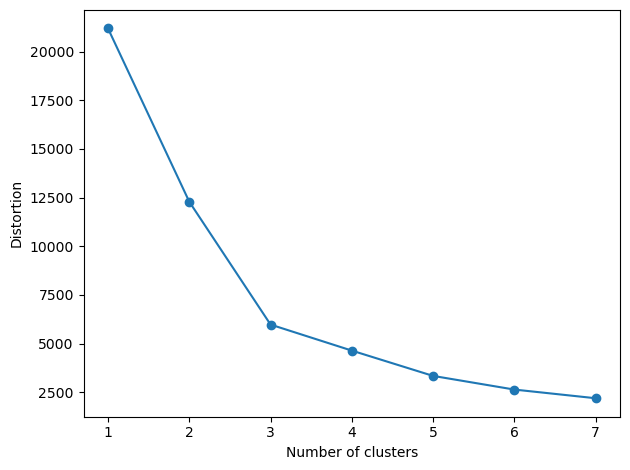

In [45]:
distortions = []
for i in range(1, 8):
    km = KMeans(n_clusters=i, 
                init='k-means++', 
                n_init=10, 
                max_iter=300)
    km.fit(X_test_pca)
    distortions.append(km.inertia_)
plt.plot(range(1, 8), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.tight_layout()
plt.show()

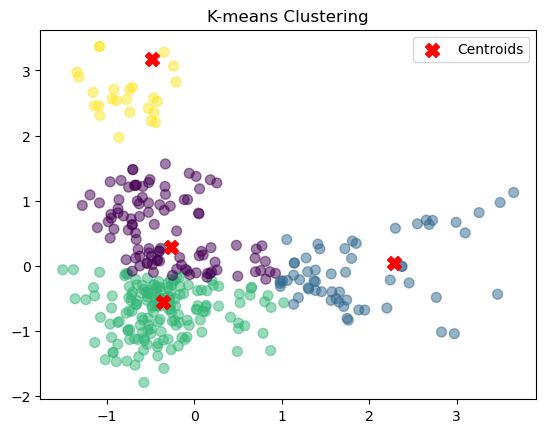

In [64]:
plt.scatter(scaled_data_test[:,0], scaled_data_test[:,1] , c = y_pred_kmeans_test, cmap= 'viridis', s= 50, alpha=0.5)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'red', label = 'Centroids',marker='X')
plt.legend() 
plt.title('K-means Clustering')
plt.show()